In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!wget https://gist.githubusercontent.com/zeionara/de67f6c5ced7a7b04eac8d6556265e8e/raw/8aac306c985bd9e9e565fd97f4c6ea51c45a7d2c/ratings.csv
!python3.11 -m pip install rfpimp seaborn

--2023-09-26 03:55:23--  https://gist.githubusercontent.com/zeionara/de67f6c5ced7a7b04eac8d6556265e8e/raw/8aac306c985bd9e9e565fd97f4c6ea51c45a7d2c/ratings.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81914 (80K) [text/plain]
Saving to: ‘ratings.csv.2’

ratings.csv.2       100%[===================>]  79.99K  --.-KB/s    in 0.05s   

2023-09-26 03:55:23 (1.57 MB/s) - ‘ratings.csv.2’ saved [81914/81914]

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3.11 install --upgrade pip


In [15]:
df = pd.read_csv('ratings.csv')
req = {
'Your Rating  '      :                                    7,
'Date Rated    '      :                          '2022-08-12',
'Title     '        :                                'Earwig',
'Title Type'       :                                  'movie',
'IMDb Rating'     :                                     5.4,
'Runtime (mins)' :                                    114.0,
'Year':                                                2021,
'Genres':                            'Drama, Fantasy, Horror',
'Num Votes':                                            '942',
'Release Date':                                  '2021-09-10',
'Directors':                          'Lucile Hadzihalilovic'}

(0, Const                                         tt10062338
Your Rating                                            7
Date Rated                                    2022-08-12
Title                                             Earwig
URL               https://www.imdb.com/title/tt10062338/
Title Type                                         movie
IMDb Rating                                          5.4
Runtime (mins)                                     114.0
Year                                                2021
Genres                            Drama, Fantasy, Horror
Num Votes                                            942
Release Date                                  2021-09-10
Directors                          Lucile Hadzihalilovic
Name: 0, dtype: object)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           520 non-null    object 
 1   Your Rating     520 non-null    int64  
 2   Date Rated      520 non-null    object 
 3   Title           520 non-null    object 
 4   URL             520 non-null    object 
 5   Title Type      520 non-null    object 
 6   IMDb Rating     520 non-null    float64
 7   Runtime (mins)  517 non-null    float64
 8   Year            520 non-null    int64  
 9   Genres          520 non-null    object 
 10  Num Votes       520 non-null    int64  
 11  Release Date    520 non-null    object 
 12  Directors       488 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 52.9+ KB


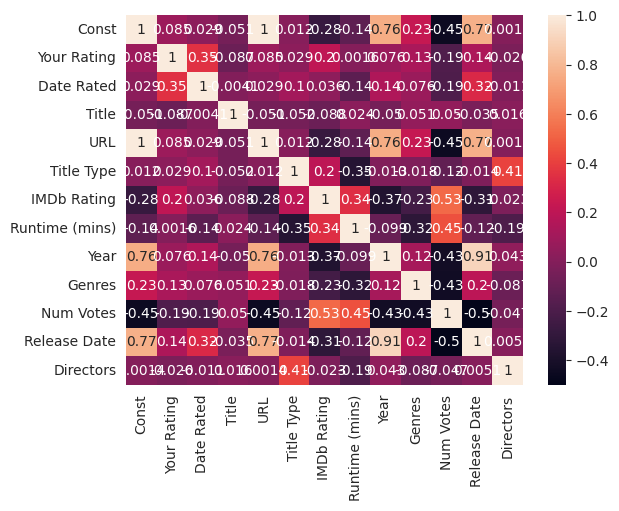

In [9]:
df_copy = df.copy()

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from rfpimp import permutation_importances

le = preprocessing.LabelEncoder()
for column_name in df_copy.columns:
    df_copy[column_name]=le.fit_transform(df_copy[column_name])

y_train = df_copy['Your Rating']
import seaborn as sns
hm = sns.heatmap(df_copy.corr(),
                 cbar=True,
                 annot=True)

In [10]:
del df_copy['Your Rating']

X_train = df_copy
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 49)
rf.fit(X_train, y_train)

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
print(perm_imp_rfpimp)

                Importance
Feature                   
Date Rated        0.580048
Genres            0.252462
IMDb Rating       0.223983
Runtime (mins)    0.157867
Num Votes         0.152003
Title             0.148589
Release Date      0.119639
Directors         0.098139
Const             0.044301
URL               0.038848
Year              0.019135
Title Type        0.001023


<Axes: >

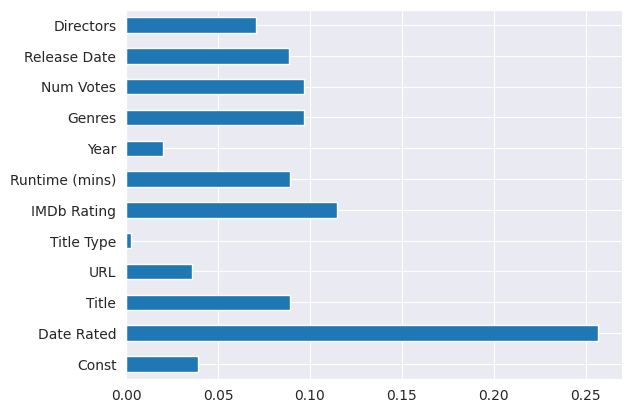

In [11]:
clf = RandomForestRegressor(criterion='poisson', random_state=0)
clf.fit(X_train, y_train)

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')

(array([  2.,   0.,  10.,  37.,  63., 129., 129.,  55.,  31.,  64.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

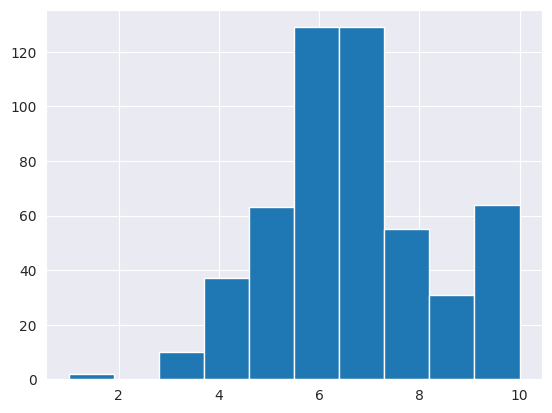

In [12]:
plt.hist(df["Your Rating"])

In [13]:
df_copy.corr()

,Const,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
Const,1.000000,0.028692,-0.051021,1.000000,0.012464,-0.282534,-0.135337,0.756617,0.228577,-0.452683,0.767594,0.001424
Date Rated,0.028692,1.000000,-0.004146,0.028692,0.104574,0.036178,-0.138765,0.144764,0.075618,-0.193401,0.316071,-0.011196
Title,-0.051021,-0.004146,1.000000,-0.051021,-0.052298,-0.088143,0.024091,-0.049800,0.051139,0.049623,-0.035339,0.016344
URL,1.000000,0.028692,-0.051021,1.000000,0.012464,-0.282534,-0.135337,0.756617,0.228577,-0.452683,0.767594,0.001424
Title Type,0.012464,0.104574,-0.052298,0.012464,1.000000,0.199001,-0.349846,-0.013114,-0.018010,-0.121778,-0.014484,0.411572
IMDb Rating,-0.282534,0.036178,-0.088143,-0.282534,0.199001,1.000000,0.343603,-0.368069,-0.233472,0.525757,-0.313056,-0.022555
Runtime (mins),-0.135337,-0.138765,0.024091,-0.135337,-0.349846,0.343603,1.000000,-0.099047,-0.322389,0.453631,-0.120434,-0.190810
Year,0.756617,0.144764,-0.049800,0.756617,-0.013114,-0.368069,-0.099047,1.000000,0.121090,-0.426845,0.909483,0.043123
Genres,0.228577,0.075618,0.051139,0.228577,-0.018010,-0.233472,-0.322389,0.121090,1.000000,-0.430886,0.195731,-0.086737
Num Votes,-0.452683,-0.193401,0.049623,-0.452683,-0.121778,0.525757,0.453631,-0.426845,-0.430886,1.000000,-0.499653,-0.047125
